<h1>Notebook Content</h1>

1. [Import Packages](#1)
1. [Helper Functions](#2)
1. [Input](#3)
1. [Model](#4)
1. [Prediction](#5)
1. [Complete Figure](#6)

<h1 id="1">1. Import Packages</h1>
Importing all necessary and useful packages in single cell.

In [399]:
import numpy as np
import keras
import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras_tqdm import TQDMNotebookCallback
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import randint

<h1 id="2">2. Helper Functions</h1>
Defining Some helper functions which we will need later in code

In [400]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps, look_ahead=0):
    X, y = list(), list()
    for i in range(len(sequence)-look_ahead):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1-look_ahead:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix+look_ahead]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def plot_multi_graph(xAxis,yAxes,title='',xAxisLabel='number',yAxisLabel='Y'):
    linestyles = ['-', '--', '-.', ':']
    plt.figure()
    plt.title(title)
    plt.xlabel(xAxisLabel)
    plt.ylabel(yAxisLabel)
    for key, value in yAxes.items():
        plt.plot(xAxis, np.array(value), label=key, linestyle=linestyles[randint(0,3)])
    plt.legend()
    
def normalize(values):
    values = array(values, dtype="float64").reshape((len(values), 1))
    # train the normalization
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    #print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
    # normalize the dataset and print the first 5 rows
    normalized = scaler.transform(values)
    return normalized,scaler

<h1 id="3">3. Input</h1>

<h3 id="3-1">3-1. Sequence PreProcessing</h3>
Splitting and Reshaping

In [401]:
n_features = 1
n_seq = 20
n_steps = 1
    
def sequence_preprocessed(values, sliding_window, look_ahead=0):
    
    # Normalization
    normalized,scaler = normalize(values)
    
    # Try the following if randomizing the sequence:
    # random.seed('sam') # set the seed
    # raw_seq = random.sample(raw_seq, 100)

    # split into samples
    X, y = split_sequence(normalized, sliding_window, look_ahead)

    # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
    X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
    
    return X,y,scaler

<h3 id="3-2">3-2. Providing Sequence</h3>
Defining a raw sequence, sliding window of data to consider and look ahead future timesteps

In [402]:
# define input sequence
sequence_val = [i for i in range(5000,7000)]
sequence_train = [i for i in range(1000,2000)]
sequence_test = [i for i in range(10000,14000)]

# choose a number of time steps for sliding window
sliding_window = 20

# choose a number of further time steps after end of sliding_window till target start (gap between data and target)
look_ahead = 20

X_train, y_train, scaler_train = sequence_preprocessed(sequence_train, sliding_window, look_ahead)
X_val, y_val ,scaler_val = sequence_preprocessed(sequence_val, sliding_window, look_ahead)
X_test,y_test,scaler_test = sequence_preprocessed(sequence_test, sliding_window, look_ahead)

<h1 id="4">4. Model</h1>

<h3 id="4-1">4-1. Defining Layers</h3>
Adding 1D Convolution, Max Pooling, LSTM and finally Dense (MLP) layer

In [403]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), 
                          input_shape=(None, n_steps, n_features)
                          ))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu', stateful=False))
model.add(Dense(1))

<h3 id="4-2">4-2. Training Model</h3>
Defined early stop, can be used in callbacks param of model fit, not using for now since it's not recommended at first few iterations of experimentation with new data

In [404]:
# Defining multiple metrics, leaving it to a choice, some may be useful and few may even surprise on some problems
metrics = ['mean_squared_error',
           'mean_absolute_error',
           'mean_absolute_percentage_error',
           'mean_squared_logarithmic_error',
           'logcosh']

# Compiling Model
model.compile(optimizer='adam', loss='mape', metrics=metrics)

# Defining early stop, call it in model fit callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Fit model
history = model.fit(X_train, y_train, epochs=100, verbose=3, validation_data=(X_val,y_val))

Train on 960 samples, validate on 1960 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100


<h3 id="4-3">4-3. Evaluating Model</h3>
Plotting Training and Validation mean square error

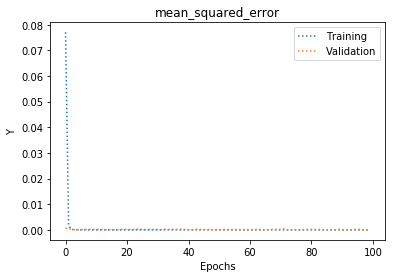

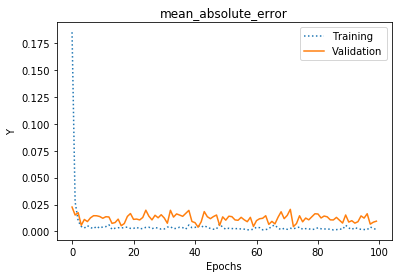

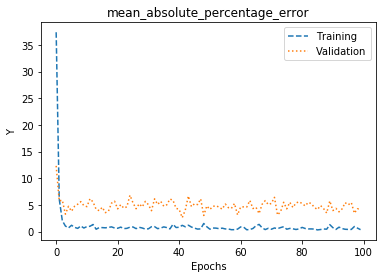

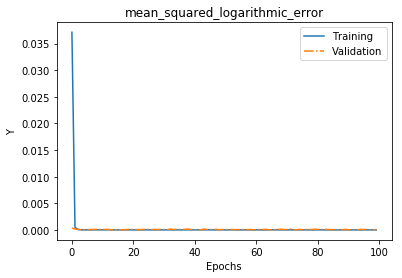

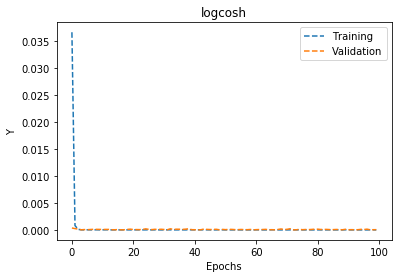

In [405]:
# Plot Errors

for metric in metrics:
    xAxis = history.epoch
    yAxes = {}
    yAxes["Training"]=history.history[metric]
    yAxes["Validation"]=history.history['val_'+metric]
    plot_multi_graph(xAxis,yAxes, title=metric,xAxisLabel='Epochs')

<h1 id="5">5. Prediction</h1>

<h3 id="5-1">5-1. Single Value Prediction</h3>
Predicting a single value slided 20 (our provided figure for look_ahead above) values ahead

In [406]:
# demonstrate prediction
x_input = array([i for i in range(100,120)])
print(x_input)
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input)
print(yhat)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
[[105.82992]]


<h3 id="5-2">5-2. Sequence Prediction</h3>
Predicting complete sequence (determining closeness to target) based on data <br />
<i>change variable for any other sequence though</i>

In [407]:
# Prediction from Training Set
predict_train = model.predict(X_train)

# Prediction from Test Set
predict_test = model.predict(X_test)

"""
df = pd.DataFrame(({"normalized y_train":y_train.flatten(),
                    "normalized predict_train":predict_train.flatten(),
                    "actual y_train":scaler_train.inverse_transform(y_train).flatten(),
                    "actual predict_train":scaler_train.inverse_transform(predict_train).flatten(),
                   }))

"""

df = pd.DataFrame(({                    
                    "normalized y_test":y_test.flatten(),
                    "normalized predict_test":predict_test.flatten(),
                    "actual y_test":scaler_test.inverse_transform(y_test).flatten(),
                    "actual predict_test":scaler_test.inverse_transform(predict_test).flatten()
                   }))
df

,normalized y_test,normalized predict_test,actual y_test,actual predict_test
0,0.010003,0.030922,10040.0,10123.657227
1,0.010253,0.031079,10041.0,10124.283203
2,0.010503,0.031235,10042.0,10124.908203
3,0.010753,0.031391,10043.0,10125.534180
4,0.011003,0.031548,10044.0,10126.159180
5,0.011253,0.031704,10045.0,10126.785156
6,0.011503,0.031861,10046.0,10127.411133
7,0.011753,0.032017,10047.0,10128.037109
8,0.012003,0.032174,10048.0,10128.662109
9,0.012253,0.032330,10049.0,10129.288086


<h1 id="6">6. Complete Figure</h1>
Data, Target, Prediction - all in one single graph

['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'logcosh']
3960/3960 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 294us/step
[7.694095613258053, 0.00023503987094495595, 0.015312134466990077, 7.694095613258053, 0.00011939386936549021, 0.0001175134772149084]


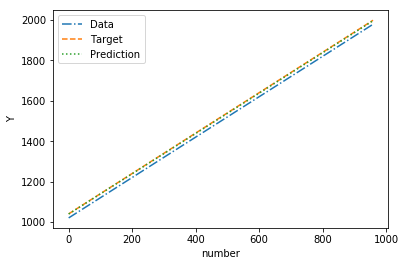

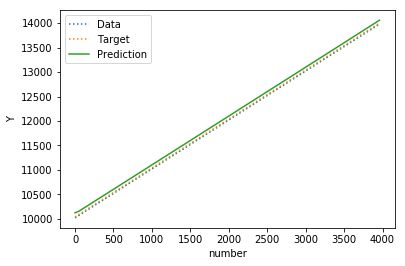

In [408]:
xAxis = [i for i in range(len(y_train))]
yAxes = {}
yAxes["Data"]=sequence_train[sliding_window:len(sequence_train)-look_ahead]
yAxes["Target"]=scaler_train.inverse_transform(y_train)
yAxes["Prediction"]=scaler_train.inverse_transform(predict_train)
plot_multi_graph(xAxis,yAxes,title='')

xAxis = [i for i in range(len(y_test))]
yAxes = {}
yAxes["Data"]=sequence_test[sliding_window:len(sequence_test)-look_ahead]
yAxes["Target"]=scaler_test.inverse_transform(y_test)
yAxes["Prediction"]=scaler_test.inverse_transform(predict_test)
plot_multi_graph(xAxis,yAxes,title='')

print(metrics)
print(model.evaluate(X_test,y_test))